# Data Prep

## read in csv vote details file into dataframe

In [1]:
#read vote data from csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 
#import seaborn as sns
import scipy as scp
%matplotlib inline

#input file
constituency="DublinWest2002_merged"
in_csv='../data/processed/'+constituency+'.csv'
#in_csv='../data/processed/'+constituency+'toptail.csv'
#in_csv='https://raw.githubusercontent.com/conorgilmer/STV-Ballot-as-a-signature/master/data/processed/'+constituency+'toptail.csv'
#read in data (setting 1st row as header)
df = pd.read_csv(in_csv, na_values=["Missing"], header=[0])

#set column names as first line
print("Print Data Frame (df.head)")
print(df.head(5))
print("Print Column names")
print(df.columns)

Print Data Frame (df.head)
   Unnamed: 0   GP   LB   FF   SP  FF.1   SF   PD   NP   FG  maxValues  \
0           0  4.0  1.0  7.0  3.0   5.0  6.0  8.0  9.0  2.0        9.0   
1           1  7.0  5.0  3.0  9.0   2.0  8.0  1.0  6.0  4.0        9.0   
2           2  NaN  3.0  1.0  5.0   2.0  4.0  NaN  NaN  NaN        5.0   
3           3  6.0  1.0  7.0  3.0   4.0  NaN  5.0  8.0  2.0        8.0   
4           4  5.0  3.0  8.0  1.0   9.0  7.0  4.0  6.0  2.0        9.0   

   Euclid Dist  Avg. Euc. Dist  Seq  
0    47.771133        5.971392    1  
1    18.954230        2.369279    1  
2    13.553393        3.388348    1  
3    43.698941        6.242706    1  
4    40.591953        5.073994    1  
Print Column names
Index(['Unnamed: 0', 'GP', 'LB', 'FF', 'SP', 'FF.1', 'SF', 'PD', 'NP', 'FG',
       'maxValues', 'Euclid Dist', 'Avg. Euc. Dist', 'Seq'],
      dtype='object')


In [2]:
#drop the numbers column (#df=df.drop(['No.'], 1))
df = df.drop(df.columns[[0]], axis=1)  # df.columns is zero-based pd.Index

In [3]:
#remove the generated columns
df=df.drop(columns=['maxValues','Euclid Dist', 'Avg. Euc. Dist'])
print(df.columns)
#print(df.head(4))

Index(['GP', 'LB', 'FF', 'SP', 'FF.1', 'SF', 'PD', 'NP', 'FG', 'Seq'], dtype='object')


In [4]:
#store the target column ('Seq') n a list
seqlist=(df['Seq'].tolist())
#print(seqlist)
display(df)
df= df.drop(columns=['Seq'], axis=1)  

,GP,LB,FF,SP,FF.1,SF,PD,NP,FG,Seq
0,4.0,1.0,7.0,3.0,5.0,6.0,8.0,9.0,2.0,1
1,7.0,5.0,3.0,9.0,2.0,8.0,1.0,6.0,4.0,1
2,NaN,3.0,1.0,5.0,2.0,4.0,NaN,NaN,NaN,1
3,6.0,1.0,7.0,3.0,4.0,NaN,5.0,8.0,2.0,1
4,5.0,3.0,8.0,1.0,9.0,7.0,4.0,6.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...
11813,7.0,NaN,8.0,5.0,4.0,3.0,6.0,1.0,2.0,0
11814,5.0,NaN,6.0,7.0,8.0,3.0,4.0,1.0,2.0,0
11815,5.0,NaN,8.0,7.0,6.0,3.0,4.0,1.0,2.0,0
11816,7.0,NaN,6.0,5.0,8.0,3.0,4.0,1.0,2.0,0


In [5]:
#convert all nan to 0
df=df.fillna(0)

In [6]:
#store all columnname as a list
listcols=df.columns.tolist()
#print(listcols)
#convert values to a list
listdf= df.values.tolist()
#print(len(listdf))
#print(listdf)
listpref_nums=[]
listpref_parties=[]
for row in range(len(listdf)):
    #nu_lizt = [0.0] * len(listdf[row])
    #nu_plizt = [''] * len(listdf[row])
    nu_plizt=[]
    nu_lizt=[]
    print(listdf[row])
    lizt=listdf[row]

    n=len(lizt)

    for i in range(0,n):
        for j in range(0,n):
            if i == int(lizt[j])-1:
                #nu_lizt[int(lizt[i]-1)] =i+1
                if lizt[j] > 0:
                    #nu_lizt[i]=j+1
                    nu_lizt.append(j+1)
#    print(nu_lizt)
    listpref_nums.append(nu_lizt)
    # store party initials in order of pref vote
    for p in range(len(nu_lizt)):
        if nu_lizt[p] > 0.0:
            nu_plizt.append(listcols[(nu_lizt[p]-1)][:2])
#    print(nu_plizt)
    listpref_parties.append(nu_plizt)    
    

[4.0, 1.0, 7.0, 3.0, 5.0, 6.0, 8.0, 9.0, 2.0]
[7.0, 5.0, 3.0, 9.0, 2.0, 8.0, 1.0, 6.0, 4.0]
[0.0, 3.0, 1.0, 5.0, 2.0, 4.0, 0.0, 0.0, 0.0]
[6.0, 1.0, 7.0, 3.0, 4.0, 0.0, 5.0, 8.0, 2.0]
[5.0, 3.0, 8.0, 1.0, 9.0, 7.0, 4.0, 6.0, 2.0]
[4.0, 2.0, 6.0, 9.0, 5.0, 7.0, 1.0, 8.0, 3.0]
[5.0, 0.0, 3.0, 4.0, 1.0, 2.0, 0.0, 0.0, 0.0]
[7.0, 6.0, 2.0, 5.0, 1.0, 3.0, 0.0, 4.0, 8.0]
[5.0, 4.0, 3.0, 0.0, 2.0, 1.0, 0.0, 0.0, 6.0]
[4.0, 5.0, 6.0, 3.0, 2.0, 1.0, 8.0, 0.0, 7.0]
[0.0, 0.0, 5.0, 1.0, 4.0, 2.0, 3.0, 0.0, 0.0]
[3.0, 1.0, 2.0, 5.0, 4.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 3.0, 7.0, 6.0, 2.0, 9.0, 5.0, 8.0, 4.0]
[7.0, 2.0, 4.0, 1.0, 3.0, 9.0, 5.0, 8.0, 6.0]
[6.0, 1.0, 3.0, 7.0, 2.0, 0.0, 4.0, 0.0, 5.0]
[7.0, 4.0, 2.0, 6.0, 1.0, 3.0, 8.0, 9.0, 5.0]
[6.0, 0.0, 5.0, 1.0, 2.0, 4.0, 7.0, 0.0, 3.0]
[6.0, 4.0, 5.0, 8.0, 1.0, 9.0, 2.0, 7.0, 3.0]
[1.0, 6.0, 0.0, 2.0, 0.0, 0.0, 5.0, 3.0, 4.0]
[3.0, 4.0, 8.0, 1.0, 7.0, 6.0, 2.0, 9.0, 5.0]
[0.0, 1.0, 5.0, 6.0, 3.0, 0.0, 4.0, 0.0, 2.0]
[5.0, 2.0, 7.0, 1.0, 6.0, 8.0, 3.0

[1.0, 0.0, 2.0, 0.0, 3.0, 0.0, 4.0, 0.0, 0.0]
[1.0, 9.0, 3.0, 2.0, 4.0, 5.0, 7.0, 6.0, 8.0]
[8.0, 2.0, 7.0, 1.0, 3.0, 5.0, 6.0, 9.0, 4.0]
[2.0, 8.0, 6.0, 1.0, 3.0, 5.0, 7.0, 9.0, 4.0]
[5.0, 3.0, 4.0, 9.0, 2.0, 6.0, 1.0, 8.0, 7.0]
[8.0, 7.0, 1.0, 6.0, 2.0, 0.0, 5.0, 4.0, 3.0]
[0.0, 3.0, 1.0, 4.0, 0.0, 0.0, 5.0, 0.0, 2.0]
[6.0, 1.0, 5.0, 4.0, 3.0, 7.0, 0.0, 8.0, 2.0]
[5.0, 2.0, 0.0, 3.0, 0.0, 0.0, 4.0, 6.0, 1.0]
[3.0, 2.0, 5.0, 0.0, 6.0, 0.0, 0.0, 4.0, 1.0]
[9.0, 8.0, 2.0, 3.0, 1.0, 7.0, 6.0, 5.0, 4.0]
[8.0, 7.0, 3.0, 1.0, 2.0, 4.0, 5.0, 0.0, 6.0]
[4.0, 6.0, 0.0, 1.0, 5.0, 2.0, 3.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 3.0, 0.0, 2.0, 4.0, 0.0, 0.0]
[2.0, 7.0, 4.0, 6.0, 5.0, 1.0, 9.0, 3.0, 8.0]
[5.0, 2.0, 3.0, 6.0, 4.0, 1.0, 7.0, 8.0, 9.0]
[3.0, 7.0, 0.0, 1.0, 0.0, 6.0, 2.0, 5.0, 4.0]
[3.0, 0.0, 5.0, 1.0, 4.0, 2.0, 6.0, 0.0, 0.0]
[0.0, 0.0, 4.0, 5.0, 2.0, 0.0, 1.0, 0.0, 3.0]
[8.0, 3.0, 4.0, 7.0, 2.0, 5.0, 6.0, 9.0, 1.0]
[3.0, 1.0, 5.0, 2.0, 6.0, 0.0, 7.0, 8.0, 4.0]
[4.0, 1.0, 5.0, 0.0, 0.0, 7.0, 2.0

[6.0, 2.0, 4.0, 1.0, 7.0, 0.0, 3.0, 8.0, 5.0]
[4.0, 3.0, 0.0, 1.0, 0.0, 0.0, 5.0, 6.0, 2.0]
[5.0, 2.0, 7.0, 1.0, 8.0, 3.0, 9.0, 4.0, 6.0]
[8.0, 2.0, 7.0, 1.0, 6.0, 4.0, 3.0, 9.0, 5.0]
[6.0, 5.0, 4.0, 7.0, 2.0, 8.0, 1.0, 9.0, 3.0]
[7.0, 8.0, 3.0, 2.0, 1.0, 6.0, 4.0, 0.0, 5.0]
[4.0, 2.0, 0.0, 1.0, 0.0, 3.0, 5.0, 0.0, 6.0]
[7.0, 3.0, 2.0, 5.0, 1.0, 9.0, 4.0, 8.0, 6.0]
[7.0, 2.0, 8.0, 3.0, 5.0, 6.0, 1.0, 0.0, 4.0]
[5.0, 1.0, 6.0, 4.0, 7.0, 8.0, 3.0, 9.0, 2.0]
[6.0, 1.0, 5.0, 2.0, 3.0, 4.0, 7.0, 0.0, 0.0]
[7.0, 3.0, 9.0, 2.0, 8.0, 1.0, 6.0, 5.0, 4.0]
[0.0, 0.0, 3.0, 1.0, 0.0, 2.0, 4.0, 0.0, 0.0]
[4.0, 1.0, 6.0, 2.0, 5.0, 0.0, 3.0, 0.0, 7.0]
[3.0, 1.0, 7.0, 8.0, 6.0, 0.0, 4.0, 5.0, 2.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 3.0]
[9.0, 3.0, 1.0, 4.0, 5.0, 6.0, 2.0, 8.0, 7.0]
[4.0, 3.0, 8.0, 1.0, 2.0, 5.0, 9.0, 6.0, 7.0]
[1.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0]
[0.0, 4.0, 0.0, 0.0, 3.0, 5.0, 2.0, 0.0, 1.0]
[3.0, 1.0, 5.0, 2.0, 4.0, 0.0, 0.0, 0.0, 0.0]
[9.0, 3.0, 4.0, 8.0, 1.0, 6.0, 5.0

[5.0, 6.0, 0.0, 1.0, 0.0, 4.0, 0.0, 3.0, 2.0]
[6.0, 4.0, 7.0, 1.0, 8.0, 3.0, 2.0, 0.0, 5.0]
[7.0, 4.0, 3.0, 1.0, 2.0, 5.0, 0.0, 0.0, 6.0]
[7.0, 3.0, 5.0, 8.0, 4.0, 9.0, 6.0, 2.0, 1.0]
[0.0, 0.0, 3.0, 0.0, 1.0, 0.0, 4.0, 2.0, 5.0]
[5.0, 1.0, 0.0, 3.0, 2.0, 0.0, 4.0, 7.0, 6.0]
[1.0, 4.0, 3.0, 5.0, 2.0, 0.0, 0.0, 0.0, 0.0]
[9.0, 3.0, 2.0, 5.0, 1.0, 7.0, 4.0, 8.0, 6.0]
[2.0, 3.0, 6.0, 7.0, 5.0, 9.0, 1.0, 8.0, 4.0]
[1.0, 3.0, 0.0, 4.0, 0.0, 0.0, 5.0, 0.0, 2.0]
[2.0, 7.0, 3.0, 5.0, 1.0, 0.0, 6.0, 0.0, 4.0]
[5.0, 2.0, 1.0, 6.0, 9.0, 3.0, 7.0, 8.0, 4.0]
[9.0, 4.0, 1.0, 5.0, 7.0, 3.0, 2.0, 8.0, 6.0]
[3.0, 4.0, 2.0, 0.0, 1.0, 0.0, 5.0, 7.0, 6.0]
[4.0, 7.0, 3.0, 2.0, 8.0, 1.0, 5.0, 6.0, 9.0]
[0.0, 0.0, 0.0, 2.0, 0.0, 3.0, 4.0, 0.0, 1.0]
[4.0, 0.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0]
[7.0, 6.0, 4.0, 1.0, 5.0, 8.0, 3.0, 9.0, 2.0]
[5.0, 3.0, 1.0, 0.0, 2.0, 0.0, 4.0, 7.0, 6.0]
[5.0, 3.0, 1.0, 0.0, 2.0, 7.0, 4.0, 0.0, 6.0]
[6.0, 1.0, 4.0, 7.0, 2.0, 0.0, 3.0, 0.0, 5.0]
[3.0, 5.0, 2.0, 8.0, 4.0, 9.0, 6.0

[5.0, 2.0, 8.0, 6.0, 3.0, 0.0, 1.0, 7.0, 4.0]
[0.0, 4.0, 1.0, 0.0, 2.0, 6.0, 3.0, 0.0, 5.0]
[0.0, 0.0, 3.0, 1.0, 2.0, 5.0, 4.0, 6.0, 7.0]
[9.0, 6.0, 2.0, 3.0, 1.0, 5.0, 8.0, 7.0, 4.0]
[2.0, 3.0, 4.0, 5.0, 6.0, 1.0, 0.0, 0.0, 7.0]
[0.0, 3.0, 5.0, 1.0, 0.0, 4.0, 6.0, 0.0, 2.0]
[8.0, 7.0, 2.0, 6.0, 1.0, 4.0, 9.0, 5.0, 3.0]
[4.0, 5.0, 0.0, 3.0, 0.0, 0.0, 0.0, 1.0, 2.0]
[7.0, 1.0, 5.0, 2.0, 3.0, 9.0, 6.0, 8.0, 4.0]
[3.0, 1.0, 7.0, 2.0, 6.0, 8.0, 4.0, 9.0, 5.0]
[0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 2.0, 1.0]
[0.0, 5.0, 3.0, 4.0, 2.0, 0.0, 1.0, 0.0, 0.0]
[6.0, 1.0, 5.0, 8.0, 4.0, 7.0, 3.0, 0.0, 2.0]
[0.0, 4.0, 6.0, 2.0, 1.0, 5.0, 0.0, 0.0, 3.0]
[3.0, 2.0, 6.0, 4.0, 1.0, 0.0, 7.0, 0.0, 5.0]
[5.0, 4.0, 1.0, 2.0, 0.0, 6.0, 7.0, 0.0, 3.0]
[3.0, 6.0, 2.0, 5.0, 1.0, 4.0, 9.0, 7.0, 8.0]
[0.0, 0.0, 0.0, 1.0, 3.0, 2.0, 0.0, 4.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0]
[4.0, 6.0, 2.0, 5.0, 3.0, 0.0, 1.0, 7.0, 8.0]
[4.0, 0.0, 2.0, 1.0, 3.0, 5.0, 0.0, 6.0, 0.0]
[1.0, 0.0, 5.0, 2.0, 0.0, 3.0, 0.0

[3.0, 4.0, 0.0, 1.0, 0.0, 2.0, 6.0, 0.0, 5.0]
[4.0, 2.0, 5.0, 6.0, 3.0, 7.0, 1.0, 8.0, 9.0]
[3.0, 7.0, 5.0, 6.0, 1.0, 2.0, 8.0, 4.0, 9.0]
[0.0, 4.0, 0.0, 1.0, 5.0, 2.0, 3.0, 0.0, 0.0]
[6.0, 3.0, 2.0, 4.0, 5.0, 9.0, 1.0, 8.0, 7.0]
[4.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 5.0, 2.0]
[8.0, 2.0, 6.0, 5.0, 1.0, 3.0, 7.0, 0.0, 4.0]
[7.0, 6.0, 0.0, 5.0, 4.0, 1.0, 3.0, 8.0, 2.0]
[6.0, 2.0, 0.0, 3.0, 1.0, 0.0, 4.0, 0.0, 5.0]
[8.0, 7.0, 1.0, 4.0, 2.0, 6.0, 3.0, 9.0, 5.0]
[6.0, 1.0, 8.0, 2.0, 5.0, 4.0, 9.0, 7.0, 3.0]
[7.0, 3.0, 5.0, 4.0, 6.0, 8.0, 2.0, 0.0, 1.0]
[4.0, 2.0, 0.0, 3.0, 1.0, 0.0, 0.0, 0.0, 5.0]
[5.0, 2.0, 7.0, 4.0, 1.0, 9.0, 6.0, 8.0, 3.0]
[5.0, 4.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0]
[8.0, 1.0, 4.0, 2.0, 3.0, 9.0, 5.0, 7.0, 6.0]
[5.0, 0.0, 0.0, 2.0, 4.0, 1.0, 0.0, 3.0, 0.0]
[6.0, 7.0, 2.0, 3.0, 1.0, 5.0, 4.0, 9.0, 8.0]
[7.0, 3.0, 0.0, 4.0, 1.0, 5.0, 6.0, 8.0, 2.0]
[2.0, 3.0, 0.0, 1.0, 5.0, 4.0, 6.0, 7.0, 8.0]
[0.0, 3.0, 2.0, 0.0, 1.0, 5.0, 4.0, 0.0, 0.0]
[3.0, 2.0, 8.0, 1.0, 5.0, 0.0, 6.0

[7.0, 8.0, 2.0, 3.0, 1.0, 5.0, 4.0, 9.0, 6.0]
[4.0, 5.0, 6.0, 3.0, 8.0, 2.0, 7.0, 1.0, 9.0]
[4.0, 0.0, 1.0, 7.0, 2.0, 3.0, 5.0, 6.0, 8.0]
[0.0, 0.0, 0.0, 3.0, 1.0, 0.0, 4.0, 0.0, 2.0]
[4.0, 1.0, 0.0, 3.0, 6.0, 0.0, 5.0, 0.0, 2.0]
[7.0, 8.0, 3.0, 6.0, 1.0, 9.0, 2.0, 5.0, 4.0]
[3.0, 1.0, 0.0, 4.0, 0.0, 6.0, 5.0, 0.0, 2.0]
[3.0, 2.0, 5.0, 0.0, 6.0, 0.0, 1.0, 0.0, 4.0]
[6.0, 2.0, 3.0, 0.0, 0.0, 1.0, 5.0, 7.0, 4.0]
[6.0, 2.0, 0.0, 1.0, 3.0, 4.0, 5.0, 0.0, 7.0]
[0.0, 1.0, 5.0, 6.0, 4.0, 0.0, 3.0, 0.0, 2.0]
[3.0, 2.0, 8.0, 1.0, 7.0, 9.0, 4.0, 5.0, 6.0]
[4.0, 8.0, 7.0, 2.0, 1.0, 9.0, 3.0, 5.0, 6.0]
[8.0, 3.0, 7.0, 1.0, 4.0, 9.0, 2.0, 6.0, 5.0]
[2.0, 0.0, 0.0, 1.0, 3.0, 4.0, 0.0, 0.0, 0.0]
[7.0, 2.0, 6.0, 4.0, 1.0, 0.0, 5.0, 0.0, 3.0]
[0.0, 3.0, 4.0, 1.0, 2.0, 0.0, 5.0, 0.0, 0.0]
[3.0, 5.0, 8.0, 6.0, 4.0, 0.0, 1.0, 7.0, 2.0]
[6.0, 3.0, 4.0, 1.0, 2.0, 7.0, 5.0, 8.0, 9.0]
[0.0, 4.0, 1.0, 2.0, 3.0, 7.0, 5.0, 6.0, 0.0]
[5.0, 0.0, 1.0, 4.0, 2.0, 3.0, 6.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 4.0, 2.0, 1.0

[9.0, 6.0, 3.0, 2.0, 1.0, 5.0, 4.0, 8.0, 7.0]
[7.0, 8.0, 2.0, 3.0, 1.0, 0.0, 6.0, 5.0, 4.0]
[2.0, 5.0, 1.0, 3.0, 0.0, 0.0, 0.0, 0.0, 4.0]
[8.0, 5.0, 2.0, 6.0, 1.0, 7.0, 4.0, 9.0, 3.0]
[0.0, 2.0, 0.0, 6.0, 1.0, 3.0, 5.0, 0.0, 4.0]
[3.0, 0.0, 2.0, 4.0, 1.0, 0.0, 5.0, 0.0, 0.0]
[0.0, 6.0, 2.0, 0.0, 1.0, 4.0, 5.0, 0.0, 3.0]
[8.0, 2.0, 3.0, 6.0, 1.0, 7.0, 4.0, 0.0, 5.0]
[0.0, 2.0, 4.0, 0.0, 1.0, 5.0, 0.0, 6.0, 3.0]
[6.0, 0.0, 5.0, 3.0, 1.0, 4.0, 0.0, 0.0, 2.0]
[0.0, 3.0, 1.0, 2.0, 6.0, 7.0, 4.0, 0.0, 5.0]
[7.0, 0.0, 3.0, 5.0, 2.0, 6.0, 1.0, 0.0, 4.0]
[0.0, 0.0, 1.0, 5.0, 2.0, 0.0, 3.0, 4.0, 0.0]
[7.0, 2.0, 8.0, 5.0, 4.0, 6.0, 1.0, 9.0, 3.0]
[0.0, 3.0, 4.0, 2.0, 6.0, 1.0, 0.0, 0.0, 5.0]
[8.0, 6.0, 2.0, 5.0, 1.0, 3.0, 7.0, 9.0, 4.0]
[6.0, 4.0, 5.0, 2.0, 3.0, 8.0, 1.0, 9.0, 7.0]
[5.0, 4.0, 6.0, 1.0, 3.0, 2.0, 9.0, 7.0, 8.0]
[4.0, 2.0, 8.0, 1.0, 7.0, 5.0, 6.0, 9.0, 3.0]
[6.0, 5.0, 4.0, 7.0, 1.0, 8.0, 3.0, 9.0, 2.0]
[6.0, 2.0, 7.0, 1.0, 5.0, 9.0, 4.0, 8.0, 3.0]
[1.0, 3.0, 6.0, 8.0, 5.0, 7.0, 4.0

[8.0, 3.0, 1.0, 4.0, 2.0, 9.0, 6.0, 7.0, 5.0]
[6.0, 3.0, 2.0, 5.0, 1.0, 4.0, 7.0, 8.0, 9.0]
[1.0, 3.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 2.0]
[0.0, 2.0, 0.0, 0.0, 1.0, 5.0, 3.0, 0.0, 4.0]
[0.0, 2.0, 3.0, 1.0, 0.0, 4.0, 0.0, 0.0, 0.0]
[4.0, 1.0, 3.0, 0.0, 2.0, 6.0, 0.0, 0.0, 5.0]
[5.0, 9.0, 4.0, 1.0, 3.0, 2.0, 7.0, 8.0, 6.0]
[4.0, 5.0, 2.0, 3.0, 1.0, 7.0, 8.0, 9.0, 6.0]
[4.0, 5.0, 3.0, 1.0, 7.0, 2.0, 6.0, 8.0, 9.0]
[7.0, 2.0, 5.0, 6.0, 3.0, 9.0, 1.0, 8.0, 4.0]
[4.0, 5.0, 3.0, 7.0, 1.0, 8.0, 2.0, 9.0, 6.0]
[7.0, 3.0, 6.0, 5.0, 2.0, 8.0, 4.0, 9.0, 1.0]
[7.0, 6.0, 3.0, 4.0, 2.0, 0.0, 1.0, 0.0, 5.0]
[0.0, 1.0, 0.0, 0.0, 5.0, 4.0, 3.0, 0.0, 2.0]
[3.0, 7.0, 8.0, 1.0, 6.0, 2.0, 5.0, 4.0, 9.0]
[8.0, 6.0, 2.0, 7.0, 5.0, 9.0, 4.0, 3.0, 1.0]
[1.0, 2.0, 3.0, 4.0, 6.0, 7.0, 8.0, 5.0, 0.0]
[0.0, 1.0, 0.0, 5.0, 0.0, 0.0, 2.0, 4.0, 3.0]
[4.0, 1.0, 5.0, 0.0, 3.0, 0.0, 2.0, 0.0, 0.0]
[1.0, 3.0, 4.0, 2.0, 5.0, 6.0, 0.0, 0.0, 0.0]
[3.0, 4.0, 5.0, 1.0, 6.0, 8.0, 7.0, 9.0, 2.0]
[4.0, 6.0, 5.0, 3.0, 1.0, 7.0, 2.0

[2.0, 3.0, 5.0, 1.0, 4.0, 0.0, 0.0, 0.0, 0.0]
[9.0, 7.0, 6.0, 8.0, 1.0, 4.0, 2.0, 5.0, 3.0]
[5.0, 3.0, 6.0, 4.0, 2.0, 0.0, 0.0, 7.0, 1.0]
[5.0, 1.0, 0.0, 2.0, 0.0, 7.0, 4.0, 6.0, 3.0]
[5.0, 0.0, 1.0, 4.0, 3.0, 2.0, 6.0, 7.0, 8.0]
[3.0, 4.0, 2.0, 0.0, 1.0, 0.0, 5.0, 0.0, 0.0]
[3.0, 6.0, 0.0, 1.0, 0.0, 2.0, 0.0, 4.0, 5.0]
[4.0, 3.0, 7.0, 5.0, 8.0, 0.0, 2.0, 6.0, 1.0]
[6.0, 2.0, 4.0, 7.0, 1.0, 8.0, 3.0, 9.0, 5.0]
[0.0, 0.0, 0.0, 2.0, 3.0, 1.0, 0.0, 0.0, 4.0]
[3.0, 1.0, 7.0, 8.0, 6.0, 5.0, 4.0, 9.0, 2.0]
[5.0, 6.0, 7.0, 1.0, 4.0, 8.0, 3.0, 9.0, 2.0]
[7.0, 6.0, 3.0, 4.0, 1.0, 9.0, 2.0, 8.0, 5.0]
[0.0, 3.0, 1.0, 6.0, 2.0, 0.0, 4.0, 0.0, 5.0]
[5.0, 4.0, 1.0, 8.0, 3.0, 7.0, 2.0, 9.0, 6.0]
[4.0, 3.0, 0.0, 2.0, 0.0, 1.0, 5.0, 0.0, 0.0]
[3.0, 7.0, 5.0, 4.0, 6.0, 1.0, 2.0, 0.0, 0.0]
[4.0, 1.0, 0.0, 5.0, 2.0, 0.0, 3.0, 0.0, 6.0]
[6.0, 4.0, 2.0, 8.0, 3.0, 1.0, 7.0, 9.0, 5.0]
[0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0]
[2.0, 3.0, 5.0, 4.0, 0.0, 1.0, 0.0, 6.0, 0.0]
[2.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0

[2.0, 7.0, 0.0, 6.0, 1.0, 0.0, 5.0, 4.0, 3.0]
[5.0, 8.0, 7.0, 4.0, 1.0, 2.0, 3.0, 9.0, 6.0]
[2.0, 7.0, 6.0, 4.0, 5.0, 3.0, 1.0, 0.0, 8.0]
[0.0, 2.0, 6.0, 4.0, 1.0, 0.0, 5.0, 0.0, 3.0]
[2.0, 3.0, 6.0, 0.0, 5.0, 4.0, 7.0, 0.0, 1.0]
[1.0, 4.0, 0.0, 2.0, 5.0, 0.0, 0.0, 0.0, 3.0]
[6.0, 0.0, 1.0, 5.0, 2.0, 4.0, 3.0, 7.0, 0.0]
[0.0, 3.0, 6.0, 5.0, 4.0, 0.0, 2.0, 0.0, 1.0]
[6.0, 7.0, 2.0, 4.0, 1.0, 9.0, 3.0, 5.0, 8.0]
[7.0, 3.0, 6.0, 5.0, 4.0, 0.0, 1.0, 0.0, 2.0]
[3.0, 4.0, 7.0, 2.0, 9.0, 1.0, 8.0, 6.0, 5.0]
[7.0, 1.0, 2.0, 8.0, 3.0, 6.0, 9.0, 5.0, 4.0]
[1.0, 3.0, 0.0, 0.0, 4.0, 0.0, 2.0, 0.0, 0.0]
[4.0, 5.0, 2.0, 6.0, 3.0, 1.0, 9.0, 7.0, 8.0]
[6.0, 1.0, 3.0, 7.0, 4.0, 2.0, 5.0, 8.0, 9.0]
[3.0, 2.0, 4.0, 6.0, 7.0, 1.0, 9.0, 8.0, 5.0]
[5.0, 4.0, 6.0, 3.0, 2.0, 7.0, 1.0, 0.0, 0.0]
[3.0, 2.0, 6.0, 7.0, 4.0, 8.0, 1.0, 9.0, 5.0]
[9.0, 4.0, 2.0, 3.0, 1.0, 8.0, 7.0, 6.0, 5.0]
[7.0, 3.0, 5.0, 2.0, 1.0, 4.0, 9.0, 6.0, 8.0]
[0.0, 4.0, 6.0, 5.0, 2.0, 0.0, 1.0, 0.0, 3.0]
[8.0, 6.0, 5.0, 1.0, 7.0, 2.0, 3.0

[0.0, 3.0, 4.0, 6.0, 1.0, 0.0, 5.0, 0.0, 2.0]
[2.0, 3.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[4.0, 5.0, 3.0, 1.0, 2.0, 0.0, 0.0, 0.0, 6.0]
[0.0, 0.0, 0.0, 3.0, 4.0, 2.0, 0.0, 1.0, 5.0]
[8.0, 5.0, 1.0, 4.0, 2.0, 6.0, 7.0, 9.0, 3.0]
[7.0, 2.0, 1.0, 6.0, 9.0, 4.0, 3.0, 5.0, 8.0]
[0.0, 2.0, 5.0, 3.0, 0.0, 0.0, 1.0, 6.0, 4.0]
[7.0, 6.0, 2.0, 1.0, 3.0, 4.0, 5.0, 0.0, 0.0]
[7.0, 5.0, 4.0, 1.0, 2.0, 9.0, 8.0, 3.0, 6.0]
[4.0, 1.0, 8.0, 2.0, 9.0, 7.0, 6.0, 5.0, 3.0]
[3.0, 1.0, 5.0, 0.0, 4.0, 0.0, 2.0, 0.0, 6.0]
[5.0, 4.0, 1.0, 6.0, 7.0, 8.0, 2.0, 9.0, 3.0]
[6.0, 4.0, 3.0, 1.0, 0.0, 0.0, 0.0, 5.0, 2.0]
[9.0, 5.0, 4.0, 6.0, 3.0, 1.0, 7.0, 8.0, 2.0]
[0.0, 1.0, 0.0, 2.0, 3.0, 0.0, 0.0, 4.0, 5.0]
[7.0, 6.0, 5.0, 2.0, 1.0, 4.0, 8.0, 9.0, 3.0]
[3.0, 4.0, 6.0, 0.0, 5.0, 0.0, 2.0, 0.0, 1.0]
[4.0, 6.0, 7.0, 3.0, 2.0, 0.0, 8.0, 1.0, 5.0]
[4.0, 5.0, 0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 3.0]
[6.0, 4.0, 5.0, 0.0, 2.0, 0.0, 1.0, 0.0, 3.0]
[9.0, 3.0, 8.0, 1.0, 6.0, 2.0, 4.0, 7.0, 5.0]
[1.0, 4.0, 5.0, 8.0, 6.0, 9.0, 3.0

[2.0, 3.0, 8.0, 1.0, 6.0, 9.0, 5.0, 4.0, 7.0]
[1.0, 4.0, 0.0, 5.0, 0.0, 2.0, 0.0, 0.0, 3.0]
[6.0, 3.0, 0.0, 1.0, 5.0, 0.0, 4.0, 0.0, 2.0]
[4.0, 1.0, 7.0, 5.0, 6.0, 9.0, 3.0, 8.0, 2.0]
[7.0, 6.0, 2.0, 5.0, 3.0, 1.0, 4.0, 0.0, 0.0]
[3.0, 9.0, 7.0, 1.0, 8.0, 5.0, 2.0, 6.0, 4.0]
[5.0, 4.0, 2.0, 1.0, 0.0, 0.0, 0.0, 3.0, 0.0]
[4.0, 7.0, 3.0, 0.0, 2.0, 8.0, 1.0, 6.0, 5.0]
[5.0, 2.0, 6.0, 7.0, 8.0, 0.0, 3.0, 4.0, 1.0]
[2.0, 4.0, 3.0, 5.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[5.0, 9.0, 2.0, 6.0, 1.0, 4.0, 7.0, 3.0, 8.0]
[0.0, 4.0, 2.0, 3.0, 1.0, 6.0, 0.0, 0.0, 5.0]
[1.0, 2.0, 0.0, 0.0, 4.0, 3.0, 6.0, 5.0, 0.0]
[8.0, 6.0, 2.0, 4.0, 1.0, 3.0, 9.0, 7.0, 5.0]
[0.0, 0.0, 2.0, 6.0, 1.0, 3.0, 5.0, 0.0, 4.0]
[3.0, 2.0, 5.0, 1.0, 4.0, 0.0, 7.0, 8.0, 6.0]
[0.0, 2.0, 4.0, 0.0, 1.0, 0.0, 3.0, 0.0, 5.0]
[4.0, 3.0, 1.0, 2.0, 5.0, 0.0, 0.0, 0.0, 0.0]
[5.0, 7.0, 2.0, 6.0, 1.0, 4.0, 3.0, 8.0, 9.0]
[0.0, 5.0, 3.0, 2.0, 1.0, 0.0, 4.0, 0.0, 0.0]
[8.0, 6.0, 7.0, 1.0, 5.0, 2.0, 3.0, 9.0, 4.0]
[6.0, 3.0, 5.0, 7.0, 4.0, 9.0, 1.0

[6.0, 5.0, 7.0, 1.0, 9.0, 4.0, 3.0, 8.0, 2.0]
[5.0, 4.0, 2.0, 6.0, 1.0, 0.0, 3.0, 0.0, 7.0]
[9.0, 3.0, 6.0, 1.0, 2.0, 7.0, 4.0, 8.0, 5.0]
[4.0, 1.0, 0.0, 3.0, 0.0, 2.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 3.0, 0.0, 2.0, 5.0, 4.0, 6.0]
[9.0, 4.0, 2.0, 5.0, 1.0, 7.0, 3.0, 8.0, 6.0]
[4.0, 1.0, 0.0, 5.0, 2.0, 0.0, 3.0, 0.0, 0.0]
[3.0, 5.0, 4.0, 1.0, 9.0, 6.0, 7.0, 8.0, 2.0]
[0.0, 6.0, 2.0, 5.0, 1.0, 7.0, 3.0, 0.0, 4.0]
[6.0, 2.0, 5.0, 1.0, 3.0, 4.0, 9.0, 7.0, 8.0]
[3.0, 6.0, 4.0, 7.0, 1.0, 9.0, 2.0, 8.0, 5.0]
[3.0, 7.0, 8.0, 1.0, 4.0, 5.0, 2.0, 0.0, 6.0]
[0.0, 1.0, 4.0, 0.0, 0.0, 0.0, 3.0, 0.0, 2.0]
[3.0, 1.0, 8.0, 4.0, 9.0, 5.0, 6.0, 7.0, 2.0]
[8.0, 3.0, 5.0, 6.0, 2.0, 7.0, 1.0, 9.0, 4.0]
[0.0, 0.0, 2.0, 0.0, 1.0, 4.0, 3.0, 0.0, 5.0]
[5.0, 2.0, 7.0, 0.0, 4.0, 6.0, 3.0, 0.0, 1.0]
[3.0, 1.0, 4.0, 9.0, 5.0, 2.0, 6.0, 8.0, 7.0]
[0.0, 4.0, 0.0, 2.0, 5.0, 0.0, 3.0, 0.0, 1.0]
[0.0, 1.0, 4.0, 3.0, 7.0, 6.0, 5.0, 0.0, 2.0]
[2.0, 6.0, 0.0, 1.0, 0.0, 4.0, 3.0, 0.0, 5.0]
[5.0, 6.0, 2.0, 4.0, 1.0, 0.0, 3.0

[3.0, 4.0, 5.0, 8.0, 1.0, 7.0, 6.0, 0.0, 2.0]
[3.0, 8.0, 7.0, 1.0, 9.0, 5.0, 6.0, 4.0, 2.0]
[5.0, 1.0, 6.0, 4.0, 2.0, 0.0, 7.0, 0.0, 3.0]
[8.0, 6.0, 4.0, 1.0, 3.0, 2.0, 5.0, 9.0, 7.0]
[8.0, 3.0, 5.0, 1.0, 4.0, 2.0, 6.0, 0.0, 7.0]
[0.0, 4.0, 0.0, 5.0, 0.0, 1.0, 3.0, 0.0, 2.0]
[0.0, 0.0, 3.0, 0.0, 2.0, 4.0, 0.0, 0.0, 1.0]
[2.0, 4.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[2.0, 1.0, 7.0, 3.0, 9.0, 4.0, 8.0, 6.0, 5.0]
[3.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 4.0]
[0.0, 5.0, 0.0, 3.0, 1.0, 2.0, 4.0, 0.0, 0.0]
[4.0, 2.0, 3.0, 8.0, 7.0, 0.0, 5.0, 6.0, 1.0]
[3.0, 5.0, 7.0, 1.0, 0.0, 8.0, 4.0, 6.0, 2.0]
[0.0, 0.0, 4.0, 0.0, 2.0, 1.0, 3.0, 0.0, 0.0]
[0.0, 2.0, 5.0, 1.0, 3.0, 4.0, 6.0, 8.0, 7.0]
[5.0, 1.0, 4.0, 0.0, 0.0, 0.0, 3.0, 0.0, 2.0]
[8.0, 3.0, 5.0, 1.0, 6.0, 7.0, 4.0, 9.0, 2.0]
[6.0, 5.0, 4.0, 1.0, 2.0, 9.0, 7.0, 3.0, 8.0]
[0.0, 2.0, 5.0, 1.0, 0.0, 4.0, 3.0, 0.0, 0.0]
[7.0, 5.0, 2.0, 3.0, 1.0, 8.0, 6.0, 0.0, 4.0]
[6.0, 7.0, 2.0, 4.0, 1.0, 0.0, 3.0, 0.0, 5.0]
[4.0, 5.0, 2.0, 9.0, 1.0, 6.0, 7.0

[0.0, 6.0, 2.0, 3.0, 1.0, 0.0, 4.0, 5.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 2.0, 3.0, 1.0, 0.0, 0.0]
[8.0, 4.0, 3.0, 9.0, 1.0, 2.0, 5.0, 7.0, 6.0]
[3.0, 1.0, 5.0, 6.0, 2.0, 8.0, 4.0, 9.0, 7.0]
[5.0, 2.0, 0.0, 3.0, 4.0, 1.0, 7.0, 0.0, 6.0]
[0.0, 2.0, 3.0, 5.0, 0.0, 0.0, 4.0, 0.0, 1.0]
[5.0, 2.0, 6.0, 1.0, 7.0, 3.0, 8.0, 9.0, 4.0]
[5.0, 4.0, 2.0, 7.0, 1.0, 6.0, 8.0, 0.0, 3.0]
[3.0, 7.0, 2.0, 8.0, 1.0, 6.0, 5.0, 9.0, 4.0]
[3.0, 1.0, 0.0, 4.0, 5.0, 0.0, 0.0, 0.0, 2.0]
[3.0, 7.0, 2.0, 6.0, 1.0, 4.0, 5.0, 0.0, 8.0]
[6.0, 5.0, 2.0, 4.0, 1.0, 9.0, 3.0, 8.0, 7.0]
[6.0, 3.0, 1.0, 4.0, 8.0, 7.0, 5.0, 9.0, 2.0]
[4.0, 5.0, 6.0, 1.0, 7.0, 2.0, 8.0, 9.0, 3.0]
[6.0, 2.0, 5.0, 8.0, 4.0, 9.0, 3.0, 7.0, 1.0]
[7.0, 1.0, 3.0, 6.0, 2.0, 9.0, 5.0, 8.0, 4.0]
[0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 2.0]
[6.0, 1.0, 4.0, 0.0, 3.0, 0.0, 5.0, 0.0, 2.0]
[3.0, 5.0, 0.0, 6.0, 7.0, 0.0, 2.0, 4.0, 1.0]
[9.0, 3.0, 5.0, 4.0, 1.0, 6.0, 7.0, 8.0, 2.0]
[3.0, 4.0, 6.0, 5.0, 7.0, 8.0, 2.0, 9.0, 1.0]
[3.0, 4.0, 6.0, 8.0, 5.0, 7.0, 2.0

[4.0, 5.0, 0.0, 1.0, 3.0, 2.0, 6.0, 0.0, 7.0]
[0.0, 0.0, 0.0, 1.0, 3.0, 4.0, 0.0, 2.0, 5.0]
[2.0, 6.0, 4.0, 0.0, 3.0, 1.0, 5.0, 0.0, 7.0]
[0.0, 5.0, 1.0, 3.0, 2.0, 4.0, 0.0, 0.0, 0.0]
[6.0, 8.0, 5.0, 2.0, 1.0, 3.0, 4.0, 0.0, 7.0]
[4.0, 1.0, 8.0, 2.0, 6.0, 7.0, 5.0, 9.0, 3.0]
[0.0, 3.0, 2.0, 0.0, 4.0, 5.0, 1.0, 0.0, 0.0]
[5.0, 2.0, 1.0, 0.0, 4.0, 0.0, 6.0, 0.0, 3.0]
[1.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0]
[1.0, 0.0, 3.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0]
[4.0, 2.0, 8.0, 6.0, 7.0, 5.0, 3.0, 0.0, 1.0]
[3.0, 9.0, 4.0, 2.0, 1.0, 7.0, 5.0, 8.0, 6.0]
[0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 3.0, 0.0, 4.0]
[3.0, 4.0, 1.0, 0.0, 6.0, 0.0, 5.0, 0.0, 2.0]
[0.0, 2.0, 3.0, 0.0, 4.0, 0.0, 0.0, 0.0, 1.0]
[3.0, 2.0, 4.0, 5.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.0, 4.0, 1.0, 7.0, 2.0, 3.0, 5.0, 0.0, 6.0]
[5.0, 8.0, 4.0, 1.0, 3.0, 7.0, 2.0, 6.0, 9.0]
[9.0, 5.0, 2.0, 6.0, 3.0, 7.0, 1.0, 8.0, 4.0]
[7.0, 4.0, 6.0, 1.0, 2.0, 5.0, 8.0, 9.0, 3.0]
[0.0, 0.0, 1.0, 0.0, 3.0, 0.0, 2.0, 0.0, 4.0]
[8.0, 4.0, 1.0, 5.0, 6.0, 7.0, 2.0

[1.0, 0.0, 0.0, 3.0, 2.0, 0.0, 0.0, 0.0, 0.0]
[7.0, 5.0, 3.0, 2.0, 4.0, 0.0, 1.0, 0.0, 6.0]
[0.0, 3.0, 4.0, 1.0, 5.0, 2.0, 0.0, 0.0, 0.0]
[4.0, 2.0, 0.0, 1.0, 0.0, 5.0, 6.0, 0.0, 3.0]
[9.0, 3.0, 1.0, 5.0, 2.0, 6.0, 4.0, 7.0, 8.0]
[4.0, 3.0, 0.0, 1.0, 6.0, 2.0, 5.0, 0.0, 7.0]
[9.0, 2.0, 4.0, 6.0, 1.0, 5.0, 7.0, 8.0, 3.0]
[6.0, 1.0, 7.0, 5.0, 4.0, 0.0, 3.0, 0.0, 2.0]
[0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 3.0, 0.0]
[0.0, 4.0, 5.0, 1.0, 3.0, 6.0, 2.0, 7.0, 8.0]
[0.0, 3.0, 7.0, 2.0, 5.0, 6.0, 1.0, 0.0, 4.0]
[5.0, 6.0, 3.0, 0.0, 4.0, 0.0, 1.0, 0.0, 2.0]
[5.0, 3.0, 2.0, 0.0, 1.0, 6.0, 4.0, 0.0, 0.0]
[8.0, 3.0, 5.0, 2.0, 1.0, 4.0, 7.0, 0.0, 6.0]
[4.0, 3.0, 5.0, 8.0, 6.0, 9.0, 1.0, 7.0, 2.0]
[5.0, 1.0, 7.0, 3.0, 8.0, 9.0, 4.0, 6.0, 2.0]
[0.0, 6.0, 3.0, 5.0, 4.0, 0.0, 2.0, 0.0, 1.0]
[0.0, 1.0, 0.0, 2.0, 3.0, 5.0, 4.0, 0.0, 0.0]
[4.0, 5.0, 0.0, 2.0, 0.0, 1.0, 0.0, 3.0, 0.0]
[5.0, 3.0, 6.0, 4.0, 1.0, 8.0, 7.0, 9.0, 2.0]
[8.0, 7.0, 2.0, 6.0, 4.0, 3.0, 5.0, 9.0, 1.0]
[6.0, 5.0, 0.0, 0.0, 1.0, 4.0, 2.0

[5.0, 0.0, 4.0, 3.0, 1.0, 2.0, 0.0, 6.0, 0.0]
[0.0, 2.0, 3.0, 6.0, 4.0, 0.0, 5.0, 0.0, 1.0]
[2.0, 4.0, 0.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0]
[4.0, 2.0, 8.0, 3.0, 1.0, 5.0, 9.0, 6.0, 7.0]
[0.0, 0.0, 2.0, 1.0, 3.0, 0.0, 4.0, 0.0, 0.0]
[4.0, 1.0, 6.0, 7.0, 5.0, 0.0, 3.0, 0.0, 2.0]
[1.0, 0.0, 0.0, 0.0, 4.0, 0.0, 2.0, 0.0, 3.0]
[0.0, 1.0, 0.0, 0.0, 3.0, 0.0, 4.0, 0.0, 2.0]
[6.0, 2.0, 5.0, 7.0, 4.0, 9.0, 1.0, 8.0, 3.0]
[0.0, 2.0, 0.0, 0.0, 3.0, 1.0, 0.0, 0.0, 0.0]
[3.0, 1.0, 8.0, 2.0, 5.0, 4.0, 6.0, 9.0, 7.0]
[8.0, 5.0, 4.0, 1.0, 3.0, 2.0, 6.0, 0.0, 7.0]
[2.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 4.0, 1.0]
[1.0, 2.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0]
[5.0, 3.0, 0.0, 4.0, 6.0, 7.0, 2.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 3.0, 0.0]
[6.0, 3.0, 5.0, 2.0, 1.0, 7.0, 4.0, 8.0, 9.0]
[0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 3.0, 5.0, 4.0]
[9.0, 6.0, 4.0, 2.0, 3.0, 1.0, 5.0, 8.0, 7.0]
[3.0, 1.0, 5.0, 2.0, 6.0, 4.0, 8.0, 0.0, 7.0]
[0.0, 3.0, 4.0, 1.0, 0.0, 2.0, 0.0, 5.0, 0.0]
[3.0, 2.0, 6.0, 4.0, 7.0, 0.0, 0.0

[2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 4.0, 5.0]
[0.0, 0.0, 3.0, 4.0, 1.0, 0.0, 2.0, 0.0, 0.0]
[2.0, 8.0, 4.0, 1.0, 6.0, 3.0, 0.0, 5.0, 7.0]
[6.0, 1.0, 7.0, 3.0, 4.0, 9.0, 2.0, 8.0, 5.0]
[0.0, 4.0, 0.0, 1.0, 0.0, 3.0, 0.0, 0.0, 2.0]
[0.0, 2.0, 5.0, 0.0, 1.0, 0.0, 3.0, 0.0, 4.0]
[3.0, 9.0, 2.0, 1.0, 4.0, 5.0, 7.0, 6.0, 8.0]
[0.0, 5.0, 3.0, 0.0, 4.0, 0.0, 1.0, 0.0, 2.0]
[7.0, 2.0, 6.0, 3.0, 1.0, 8.0, 4.0, 9.0, 5.0]
[0.0, 0.0, 0.0, 2.0, 3.0, 0.0, 0.0, 0.0, 1.0]
[8.0, 3.0, 1.0, 7.0, 6.0, 2.0, 4.0, 9.0, 5.0]
[7.0, 5.0, 6.0, 4.0, 1.0, 0.0, 2.0, 0.0, 3.0]
[6.0, 2.0, 5.0, 0.0, 4.0, 0.0, 3.0, 0.0, 1.0]
[5.0, 8.0, 3.0, 2.0, 1.0, 9.0, 4.0, 6.0, 7.0]
[4.0, 1.0, 0.0, 2.0, 0.0, 0.0, 3.0, 0.0, 5.0]
[3.0, 2.0, 8.0, 5.0, 9.0, 7.0, 6.0, 4.0, 1.0]
[5.0, 7.0, 4.0, 1.0, 2.0, 0.0, 3.0, 0.0, 6.0]
[1.0, 0.0, 4.0, 3.0, 0.0, 0.0, 5.0, 0.0, 2.0]
[6.0, 4.0, 7.0, 5.0, 1.0, 0.0, 3.0, 0.0, 2.0]
[0.0, 0.0, 4.0, 1.0, 3.0, 2.0, 5.0, 0.0, 0.0]
[4.0, 3.0, 0.0, 6.0, 0.0, 5.0, 2.0, 0.0, 1.0]
[0.0, 2.0, 3.0, 0.0, 4.0, 0.0, 5.0

[0.0, 5.0, 4.0, 0.0, 1.0, 0.0, 2.0, 6.0, 3.0]
[6.0, 0.0, 2.0, 5.0, 1.0, 0.0, 3.0, 4.0, 7.0]
[3.0, 1.0, 8.0, 6.0, 9.0, 4.0, 5.0, 7.0, 2.0]
[4.0, 3.0, 8.0, 1.0, 9.0, 2.0, 6.0, 5.0, 7.0]
[1.0, 0.0, 4.0, 0.0, 2.0, 0.0, 0.0, 3.0, 0.0]
[7.0, 3.0, 5.0, 4.0, 2.0, 0.0, 8.0, 6.0, 1.0]
[0.0, 0.0, 2.0, 3.0, 1.0, 5.0, 4.0, 0.0, 0.0]
[3.0, 7.0, 6.0, 1.0, 9.0, 2.0, 5.0, 8.0, 4.0]
[0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 3.0]
[3.0, 8.0, 1.0, 9.0, 2.0, 5.0, 4.0, 6.0, 7.0]
[3.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 5.0, 7.0, 8.0, 6.0, 4.0, 3.0, 9.0, 2.0]
[7.0, 9.0, 4.0, 2.0, 3.0, 1.0, 5.0, 8.0, 6.0]
[4.0, 3.0, 0.0, 2.0, 0.0, 0.0, 0.0, 5.0, 1.0]
[9.0, 5.0, 7.0, 4.0, 2.0, 6.0, 1.0, 8.0, 3.0]
[8.0, 2.0, 6.0, 1.0, 5.0, 7.0, 3.0, 9.0, 4.0]
[0.0, 0.0, 3.0, 5.0, 4.0, 0.0, 1.0, 0.0, 2.0]
[6.0, 4.0, 5.0, 0.0, 3.0, 0.0, 2.0, 0.0, 1.0]
[2.0, 5.0, 6.0, 1.0, 0.0, 7.0, 4.0, 8.0, 3.0]
[6.0, 2.0, 3.0, 0.0, 4.0, 0.0, 5.0, 7.0, 1.0]
[0.0, 1.0, 5.0, 7.0, 4.0, 3.0, 2.0, 8.0, 6.0]
[5.0, 3.0, 0.0, 1.0, 6.0, 2.0, 0.0

[0.0, 0.0, 3.0, 4.0, 1.0, 0.0, 2.0, 0.0, 5.0]
[4.0, 3.0, 5.0, 1.0, 6.0, 0.0, 2.0, 0.0, 7.0]
[3.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 2.0, 4.0, 5.0, 3.0, 0.0, 0.0, 6.0]
[0.0, 4.0, 3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0]
[0.0, 4.0, 3.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0]
[2.0, 3.0, 0.0, 1.0, 4.0, 5.0, 0.0, 0.0, 6.0]
[0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0]
[5.0, 2.0, 0.0, 0.0, 4.0, 0.0, 3.0, 0.0, 1.0]
[2.0, 3.0, 9.0, 4.0, 5.0, 1.0, 6.0, 8.0, 7.0]
[0.0, 1.0, 3.0, 0.0, 0.0, 0.0, 2.0, 0.0, 4.0]
[5.0, 3.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 4.0]
[0.0, 2.0, 5.0, 3.0, 1.0, 4.0, 0.0, 0.0, 0.0]
[4.0, 0.0, 0.0, 1.0, 0.0, 2.0, 3.0, 0.0, 0.0]
[5.0, 4.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 3.0]
[1.0, 2.0, 0.0, 3.0, 0.0, 6.0, 4.0, 0.0, 5.0]
[4.0, 6.0, 2.0, 7.0, 3.0, 0.0, 5.0, 0.0, 1.0]
[5.0, 1.0, 0.0, 2.0, 0.0, 3.0, 0.0, 0.0, 4.0]
[4.0, 3.0, 7.0, 2.0, 8.0, 1.0, 9.0, 5.0, 6.0]
[0.0, 1.0, 0.0, 2.0, 3.0, 0.0, 4.0, 0.0, 5.0]
[6.0, 1.0, 5.0, 2.0, 3.0, 9.0, 7.0, 8.0, 4.0]
[2.0, 0.0, 0.0, 1.0, 0.0, 0.0, 4.0

[3.0, 2.0, 0.0, 5.0, 8.0, 6.0, 4.0, 7.0, 1.0]
[5.0, 4.0, 0.0, 1.0, 0.0, 0.0, 2.0, 0.0, 3.0]
[0.0, 1.0, 5.0, 3.0, 2.0, 0.0, 4.0, 0.0, 6.0]
[3.0, 2.0, 0.0, 5.0, 1.0, 0.0, 4.0, 6.0, 0.0]
[0.0, 4.0, 0.0, 5.0, 2.0, 1.0, 3.0, 0.0, 6.0]
[3.0, 0.0, 5.0, 0.0, 2.0, 0.0, 4.0, 0.0, 1.0]
[7.0, 5.0, 6.0, 1.0, 3.0, 2.0, 4.0, 8.0, 9.0]
[7.0, 5.0, 6.0, 3.0, 4.0, 2.0, 0.0, 8.0, 1.0]
[0.0, 4.0, 2.0, 0.0, 1.0, 5.0, 0.0, 0.0, 3.0]
[5.0, 2.0, 0.0, 3.0, 0.0, 6.0, 4.0, 0.0, 1.0]
[4.0, 3.0, 0.0, 5.0, 0.0, 0.0, 1.0, 0.0, 2.0]
[2.0, 5.0, 0.0, 1.0, 0.0, 0.0, 3.0, 0.0, 4.0]
[2.0, 4.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 1.0]
[5.0, 6.0, 3.0, 1.0, 2.0, 0.0, 4.0, 0.0, 7.0]
[5.0, 0.0, 4.0, 1.0, 0.0, 0.0, 3.0, 0.0, 2.0]
[0.0, 3.0, 0.0, 0.0, 4.0, 0.0, 2.0, 0.0, 1.0]
[0.0, 3.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[4.0, 1.0, 5.0, 2.0, 0.0, 0.0, 3.0, 0.0, 0.0]
[4.0, 6.0, 2.0, 1.0, 3.0, 0.0, 0.0, 0.0, 5.0]
[4.0, 0.0, 0.0, 2.0, 3.0, 0.0, 0.0, 0.0, 1.0]
[3.0, 2.0, 0.0, 1.0, 5.0, 0.0, 4.0, 0.0, 0.0]
[0.0, 4.0, 3.0, 2.0, 1.0, 0.0, 6.0

[3.0, 0.0, 5.0, 2.0, 1.0, 4.0, 0.0, 0.0, 0.0]
[0.0, 2.0, 0.0, 4.0, 0.0, 0.0, 3.0, 5.0, 1.0]
[1.0, 3.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 2.0]
[3.0, 2.0, 0.0, 1.0, 0.0, 4.0, 6.0, 5.0, 0.0]
[0.0, 3.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0]
[4.0, 0.0, 0.0, 1.0, 0.0, 2.0, 3.0, 5.0, 6.0]
[7.0, 6.0, 5.0, 4.0, 1.0, 2.0, 8.0, 9.0, 3.0]
[6.0, 7.0, 8.0, 1.0, 2.0, 3.0, 4.0, 9.0, 5.0]
[0.0, 5.0, 2.0, 0.0, 1.0, 0.0, 3.0, 0.0, 4.0]
[0.0, 0.0, 4.0, 1.0, 2.0, 3.0, 0.0, 0.0, 0.0]
[2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 3.0]
[4.0, 2.0, 7.0, 9.0, 1.0, 6.0, 3.0, 5.0, 8.0]
[6.0, 5.0, 2.0, 0.0, 3.0, 0.0, 1.0, 0.0, 4.0]
[3.0, 4.0, 7.0, 1.0, 2.0, 0.0, 6.0, 0.0, 5.0]
[6.0, 2.0, 7.0, 1.0, 3.0, 9.0, 5.0, 8.0, 4.0]
[4.0, 6.0, 3.0, 0.0, 2.0, 0.0, 1.0, 7.0, 5.0]
[0.0, 1.0, 0.0, 3.0, 0.0, 2.0, 0.0, 5.0, 4.0]
[0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 3.0, 0.0, 4.0]
[0.0, 4.0, 0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 2.0]
[5.0, 3.0, 1.0, 2.0, 0.0, 4.0, 6.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0]
[1.0, 4.0, 0.0, 0.0, 0.0, 0.0, 3.0

[4.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0]
[0.0, 3.0, 5.0, 6.0, 1.0, 0.0, 4.0, 0.0, 2.0]
[4.0, 2.0, 5.0, 0.0, 7.0, 1.0, 6.0, 3.0, 8.0]
[0.0, 5.0, 4.0, 1.0, 2.0, 0.0, 3.0, 0.0, 0.0]
[4.0, 0.0, 2.0, 0.0, 1.0, 0.0, 5.0, 0.0, 3.0]
[0.0, 0.0, 3.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0]
[7.0, 5.0, 4.0, 1.0, 2.0, 3.0, 8.0, 9.0, 6.0]
[3.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0]
[2.0, 1.0, 3.0, 7.0, 4.0, 8.0, 6.0, 0.0, 5.0]
[7.0, 3.0, 5.0, 2.0, 1.0, 4.0, 6.0, 0.0, 0.0]
[8.0, 1.0, 4.0, 7.0, 6.0, 3.0, 5.0, 9.0, 2.0]
[6.0, 4.0, 3.0, 1.0, 2.0, 9.0, 5.0, 8.0, 7.0]
[2.0, 3.0, 0.0, 4.0, 0.0, 0.0, 5.0, 0.0, 1.0]
[1.0, 3.0, 8.0, 2.0, 9.0, 7.0, 4.0, 5.0, 6.0]
[0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[2.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[2.0, 4.0, 5.0, 1.0, 6.0, 3.0, 9.0, 7.0, 8.0]
[0.0, 2.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0]
[0.0, 4.0, 1.0, 2.0, 3.0, 0.0, 0.0, 0.0, 5.0]
[0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 4.0, 0.0, 3.0]
[3.0, 2.0, 0.0, 1.0, 6.0, 4.0, 7.0

[1.0, 0.0, 7.0, 3.0, 0.0, 6.0, 4.0, 5.0, 2.0]
[1.0, 0.0, 0.0, 3.0, 7.0, 6.0, 4.0, 5.0, 2.0]
[1.0, 4.0, 5.0, 6.0, 0.0, 3.0, 7.0, 0.0, 2.0]
[1.0, 4.0, 0.0, 5.0, 0.0, 3.0, 6.0, 7.0, 2.0]
[1.0, 4.0, 0.0, 6.0, 5.0, 3.0, 7.0, 0.0, 2.0]
[1.0, 4.0, 7.0, 6.0, 0.0, 3.0, 5.0, 0.0, 2.0]
[1.0, 4.0, 0.0, 6.0, 7.0, 3.0, 5.0, 0.0, 2.0]
[1.0, 7.0, 4.0, 5.0, 0.0, 3.0, 6.0, 0.0, 2.0]
[1.0, 0.0, 4.0, 5.0, 0.0, 3.0, 6.0, 7.0, 2.0]
[1.0, 7.0, 0.0, 5.0, 4.0, 3.0, 6.0, 0.0, 2.0]
[1.0, 0.0, 0.0, 5.0, 4.0, 3.0, 6.0, 7.0, 2.0]
[1.0, 5.0, 7.0, 6.0, 0.0, 3.0, 4.0, 0.0, 2.0]
[1.0, 5.0, 0.0, 6.0, 7.0, 3.0, 4.0, 0.0, 2.0]
[1.0, 6.0, 7.0, 5.0, 0.0, 3.0, 4.0, 0.0, 2.0]
[1.0, 6.0, 0.0, 5.0, 7.0, 3.0, 4.0, 0.0, 2.0]
[1.0, 7.0, 6.0, 5.0, 0.0, 3.0, 4.0, 0.0, 2.0]
[1.0, 0.0, 6.0, 5.0, 0.0, 3.0, 4.0, 7.0, 2.0]
[1.0, 7.0, 0.0, 5.0, 6.0, 3.0, 4.0, 0.0, 2.0]
[1.0, 0.0, 0.0, 5.0, 6.0, 3.0, 4.0, 7.0, 2.0]
[1.0, 0.0, 7.0, 6.0, 0.0, 3.0, 5.0, 4.0, 2.0]
[1.0, 0.0, 0.0, 6.0, 7.0, 3.0, 5.0, 4.0, 2.0]
[1.0, 0.0, 7.0, 6.0, 0.0, 4.0, 5.0

[2.0, 3.0, 0.0, 6.0, 1.0, 4.0, 7.0, 0.0, 5.0]
[2.0, 7.0, 3.0, 4.0, 1.0, 6.0, 5.0, 0.0, 0.0]
[2.0, 0.0, 3.0, 4.0, 1.0, 6.0, 5.0, 7.0, 0.0]
[2.0, 0.0, 3.0, 4.0, 1.0, 6.0, 5.0, 0.0, 7.0]
[2.0, 7.0, 3.0, 4.0, 1.0, 6.0, 0.0, 0.0, 5.0]
[2.0, 0.0, 3.0, 4.0, 1.0, 6.0, 7.0, 0.0, 5.0]
[2.0, 7.0, 3.0, 6.0, 1.0, 4.0, 5.0, 0.0, 0.0]
[2.0, 0.0, 3.0, 6.0, 1.0, 4.0, 5.0, 7.0, 0.0]
[2.0, 0.0, 3.0, 6.0, 1.0, 4.0, 5.0, 0.0, 7.0]
[2.0, 7.0, 3.0, 6.0, 1.0, 4.0, 0.0, 0.0, 5.0]
[2.0, 0.0, 3.0, 6.0, 1.0, 4.0, 7.0, 0.0, 5.0]
[2.0, 0.0, 0.0, 5.0, 1.0, 3.0, 4.0, 7.0, 6.0]
[2.0, 7.0, 0.0, 5.0, 1.0, 3.0, 6.0, 0.0, 4.0]
[2.0, 0.0, 0.0, 5.0, 1.0, 3.0, 6.0, 7.0, 4.0]
[2.0, 5.0, 7.0, 4.0, 1.0, 6.0, 3.0, 0.0, 0.0]
[2.0, 5.0, 0.0, 4.0, 1.0, 6.0, 3.0, 0.0, 7.0]
[2.0, 7.0, 5.0, 4.0, 1.0, 6.0, 3.0, 0.0, 0.0]
[2.0, 0.0, 5.0, 4.0, 1.0, 6.0, 3.0, 7.0, 0.0]
[2.0, 0.0, 5.0, 4.0, 1.0, 6.0, 3.0, 0.0, 7.0]
[2.0, 7.0, 0.0, 4.0, 1.0, 6.0, 3.0, 0.0, 5.0]
[2.0, 0.0, 7.0, 4.0, 1.0, 6.0, 3.0, 0.0, 5.0]
[2.0, 0.0, 0.0, 4.0, 1.0, 6.0, 3.0

[5.0, 0.0, 0.0, 3.0, 4.0, 7.0, 2.0, 1.0, 6.0]
[7.0, 0.0, 6.0, 3.0, 4.0, 5.0, 2.0, 1.0, 0.0]
[7.0, 0.0, 0.0, 3.0, 4.0, 5.0, 2.0, 1.0, 6.0]
[0.0, 7.0, 0.0, 3.0, 4.0, 5.0, 2.0, 1.0, 6.0]
[5.0, 0.0, 6.0, 3.0, 0.0, 7.0, 2.0, 1.0, 4.0]
[5.0, 0.0, 0.0, 3.0, 6.0, 7.0, 2.0, 1.0, 4.0]
[5.0, 0.0, 7.0, 3.0, 0.0, 6.0, 2.0, 1.0, 4.0]
[5.0, 0.0, 0.0, 3.0, 7.0, 6.0, 2.0, 1.0, 4.0]
[6.0, 0.0, 7.0, 3.0, 0.0, 5.0, 2.0, 1.0, 4.0]
[6.0, 0.0, 0.0, 3.0, 7.0, 5.0, 2.0, 1.0, 4.0]
[7.0, 0.0, 6.0, 3.0, 0.0, 5.0, 2.0, 1.0, 4.0]
[0.0, 7.0, 6.0, 3.0, 0.0, 5.0, 2.0, 1.0, 4.0]
[7.0, 0.0, 0.0, 3.0, 6.0, 5.0, 2.0, 1.0, 4.0]
[0.0, 7.0, 0.0, 3.0, 6.0, 5.0, 2.0, 1.0, 4.0]
[4.0, 0.0, 7.0, 6.0, 0.0, 3.0, 2.0, 1.0, 5.0]
[4.0, 0.0, 0.0, 6.0, 7.0, 3.0, 2.0, 1.0, 5.0]
[7.0, 4.0, 0.0, 5.0, 0.0, 3.0, 2.0, 1.0, 6.0]
[7.0, 0.0, 4.0, 5.0, 6.0, 3.0, 2.0, 1.0, 0.0]
[7.0, 0.0, 4.0, 5.0, 0.0, 3.0, 2.0, 1.0, 6.0]
[0.0, 7.0, 4.0, 5.0, 0.0, 3.0, 2.0, 1.0, 6.0]
[7.0, 0.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0]
[7.0, 0.0, 0.0, 5.0, 4.0, 3.0, 2.0

In [7]:
#len(listpref_parties)
#for ls in range(len(listpref_parties)):
#    print(listpref_parties[ls])

In [8]:
#display(listpref_parties)
dfpar = pd.DataFrame(listpref_parties)
dfnums = pd.DataFrame(listpref_nums)

In [9]:
display(dfpar)

,0,1,2,3,4,5,6,7,8
0,LB,FG,SP,GP,FF,SF,FF,PD,NP
1,PD,FF,FF,FG,LB,NP,GP,SF,SP
2,FF,FF,LB,SF,SP,None,None,None,None
3,LB,FG,SP,FF,PD,GP,FF,NP,None
4,SP,FG,LB,PD,GP,NP,SF,FF,FF
...,...,...,...,...,...,...,...,...,...
11813,NP,FG,SF,FF,SP,PD,GP,FF,None
11814,NP,FG,SF,PD,GP,FF,SP,FF,None
11815,NP,FG,SF,PD,GP,FF,SP,FF,None
11816,NP,FG,SF,PD,SP,FF,GP,FF,None


In [10]:
#convert all nan to 0
dfnums=dfnums.fillna(0)
dfnums = dfnums.astype(int)
#display(dfnums)
dfnums.columns += 1
display(dfnums.head(5))


,1,2,3,4,5,6,7,8,9
0,2,9,4,1,5,6,3,7,8
1,7,5,3,9,2,8,1,6,4
2,3,5,2,6,4,0,0,0,0
3,2,9,4,5,7,1,3,8,0
4,4,9,2,7,1,8,6,3,5


In [11]:
dfnums['Seq'] = seqlist
display(dfnums)

,1,2,3,4,5,6,7,8,9,Seq
0,2,9,4,1,5,6,3,7,8,1
1,7,5,3,9,2,8,1,6,4,1
2,3,5,2,6,4,0,0,0,0,1
3,2,9,4,5,7,1,3,8,0,1
4,4,9,2,7,1,8,6,3,5,1
...,...,...,...,...,...,...,...,...,...,...
11813,8,9,6,5,4,7,1,3,0,0
11814,8,9,6,7,1,3,4,5,0,0
11815,8,9,6,7,1,5,4,3,0,0
11816,8,9,6,7,4,3,1,5,0,0


In [12]:
#download compass data positioning irish political parties on the political spectrum
#pcData='../data/pc.csv'
pcData='https://raw.githubusercontent.com/conorgilmer/STV-Ballot-as-a-signature/master/data/pc.csv'

#set column names
col_names = ['party', 'xaxis', 'yaxis']
#read in political compass data
dfPC = pd.read_csv(pcData, na_values=["Missing"], names=col_names)
print("Irish Parties on Political Compass")
print(dfPC)
points=[]
points = dfPC.party
x=[] #x-axis coordinates
y=[] #y-axis coordinates
pt=[]

#populate two lists with the x and y - coordinates
for p in points:
    pt.append(dfPC.party)
    x.append(dfPC.xaxis)
    y.append(dfPC.yaxis)

Irish Parties on Political Compass
  party  xaxis  yaxis
0    SP   -7.0   -2.5
1    SF   -4.5    1.0
2    GP   -1.0   -2.0
3    NP    0.0    0.0
4    LB    1.5   -0.5
5    FF    2.5    2.4
6    FG    3.5    2.5
7    PD    4.0    3.0


In [13]:
def getEuclidVoteDetails(voteRow, dfPC):
    #populate 3 lists with text, x co-ord and y co-ord
    partyPCList = dfPC.party.tolist()
   # print("partyList",partyPCList)
    xi=[]
    yi=[]
    pp=[]
    for d in voteRow:
        inx=partyPCList.index(d)
        pp.append(dfPC.iloc[inx].tolist()[0])
        xi.append(dfPC.iloc[inx].tolist()[1])
        yi.append(dfPC.iloc[inx].tolist()[2])

   # for ip in range(len(pp)):
   #     print(f"{ip+1} - {pp[ip]} ({xi[ip]}, {yi[ip]})")

    pref_dist=[]
    #Calculate the eculidean distance a vote travels on the political spectrum
    dist = 0
    total_dist=0
    for pl in range(len(pp)):
    # initializing points in # numpy arrays      
        if pl != (len(pp)-1):
            point1 = np.array((xi[pl],yi[pl]))
            point2 = np.array((xi[pl+1],yi[pl+1]))

    #calculating Euclidean distance # using linalg.norm()
            dist = np.linalg.norm(point1 - point2)
            #print(f"Euclidean distance between vote {pl+1} and {pl+2} is {dist}")
            total_dist = total_dist + dist
            pref_dist.append(dist)
 #   print(total_dist, len(pp))
    if len(pp) > 1:
        avg_dist = total_dist/(len(pp)-1)    
    else:
        avg_dist = total_dist
    #print("Total Distance Travelled on Political Compass as a vote transfers ", total_dist)
    #print("Average Distance Travelled on Political Compass of each vote transfers ", avg_dist)

    return(total_dist, avg_dist, pref_dist)

In [14]:
#save votes a list of the party initials to dataframe and csv file
dfparties = pd.DataFrame(listpref_parties)
#reset column names (transfers) to start at 1
dfparties.columns = pd.RangeIndex(1, len(dfparties.columns)+1) 
#dfparties.columns += 1
#add the target column (Sequence 0=irregular 1= regular) back in
dfparties['Seq'] = seqlist
display(dfparties)
#Save Dataframe to csv file
out_csv='../data/processed/'+constituency+'_parties.csv'
print("Saving  dataframe as ", out_csv)
dfparties.to_csv(out_csv)

,1,2,3,4,5,6,7,8,9,Seq
0,LB,FG,SP,GP,FF,SF,FF,PD,NP,1
1,PD,FF,FF,FG,LB,NP,GP,SF,SP,1
2,FF,FF,LB,SF,SP,None,None,None,None,1
3,LB,FG,SP,FF,PD,GP,FF,NP,None,1
4,SP,FG,LB,PD,GP,NP,SF,FF,FF,1
...,...,...,...,...,...,...,...,...,...,...
11813,NP,FG,SF,FF,SP,PD,GP,FF,None,0
11814,NP,FG,SF,PD,GP,FF,SP,FF,None,0
11815,NP,FG,SF,PD,GP,FF,SP,FF,None,0
11816,NP,FG,SF,PD,SP,FF,GP,FF,None,0


Saving  dataframe as  ../data/processed/DublinWest2002_merged_parties.csv


## Create dataframe of votes with the tranfer euclidean distance travelled

In [15]:
#create dataframe of votes with the tranfer euclidean distance travelled
list_transdist=[]
for ls in range(len(listpref_parties)):
    #print(listpref_parties[ls])
    (tD, aD, dist_row) = getEuclidVoteDetails(listpref_parties[ls], dfPC)
    list_transdist.append(dist_row)

dftrans = pd.DataFrame(list_transdist)
#display(dftrans)

In [16]:
#reset column names (transfers) to start at 1
#dftrans.columns = pd.RangeIndex(1, len(dftrans.columns)+1) 
dftrans.columns += 1

#convert all NaN to 0
dftrans=dftrans.fillna(0)
display(dftrans)

,1,2,3,4,5,6,7,8
0,3.605551,11.629703,6.020797,5.622277,7.138627,7.138627,1.615549,5.000000
1,1.615549,0.000000,1.004988,3.605551,1.581139,2.236068,4.609772,4.301163
2,0.000000,3.067572,6.184658,4.301163,0.000000,0.000000,0.000000,0.000000
3,3.605551,11.629703,10.689247,1.615549,7.071068,5.622277,3.465545,0.000000
4,11.629703,3.605551,4.301163,7.071068,2.236068,4.609772,7.138627,0.000000
...,...,...,...,...,...,...,...,...
11813,4.301163,8.139410,7.138627,10.689247,12.298374,7.071068,5.622277,0.000000
11814,4.301163,8.139410,8.732125,7.071068,5.622277,10.689247,10.689247,0.000000
11815,4.301163,8.139410,8.732125,7.071068,5.622277,10.689247,10.689247,0.000000
11816,4.301163,8.139410,8.732125,12.298374,10.689247,5.622277,5.622277,0.000000


In [17]:
#add the target column (Sequence 0=irregular 1= regular) back in
dftrans['Seq'] = seqlist
display(dftrans)

,1,2,3,4,5,6,7,8,Seq
0,3.605551,11.629703,6.020797,5.622277,7.138627,7.138627,1.615549,5.000000,1
1,1.615549,0.000000,1.004988,3.605551,1.581139,2.236068,4.609772,4.301163,1
2,0.000000,3.067572,6.184658,4.301163,0.000000,0.000000,0.000000,0.000000,1
3,3.605551,11.629703,10.689247,1.615549,7.071068,5.622277,3.465545,0.000000,1
4,11.629703,3.605551,4.301163,7.071068,2.236068,4.609772,7.138627,0.000000,1
...,...,...,...,...,...,...,...,...,...
11813,4.301163,8.139410,7.138627,10.689247,12.298374,7.071068,5.622277,0.000000,0
11814,4.301163,8.139410,8.732125,7.071068,5.622277,10.689247,10.689247,0.000000,0
11815,4.301163,8.139410,8.732125,7.071068,5.622277,10.689247,10.689247,0.000000,0
11816,4.301163,8.139410,8.732125,12.298374,10.689247,5.622277,5.622277,0.000000,0


In [18]:
#Save Dataframe to csv file
out_csv='../data/processed/'+constituency+'_dist.csv'
print("Saving  dataframe as ", out_csv)
dftrans.to_csv(out_csv)

Saving  dataframe as  ../data/processed/DublinWest2002_merged_dist.csv


In [19]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaler.fit(dfnums.drop('Seq', axis=1))
scaled_features = scaler.transform(dfnums.drop('Seq', axis=1))

/anaconda38/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


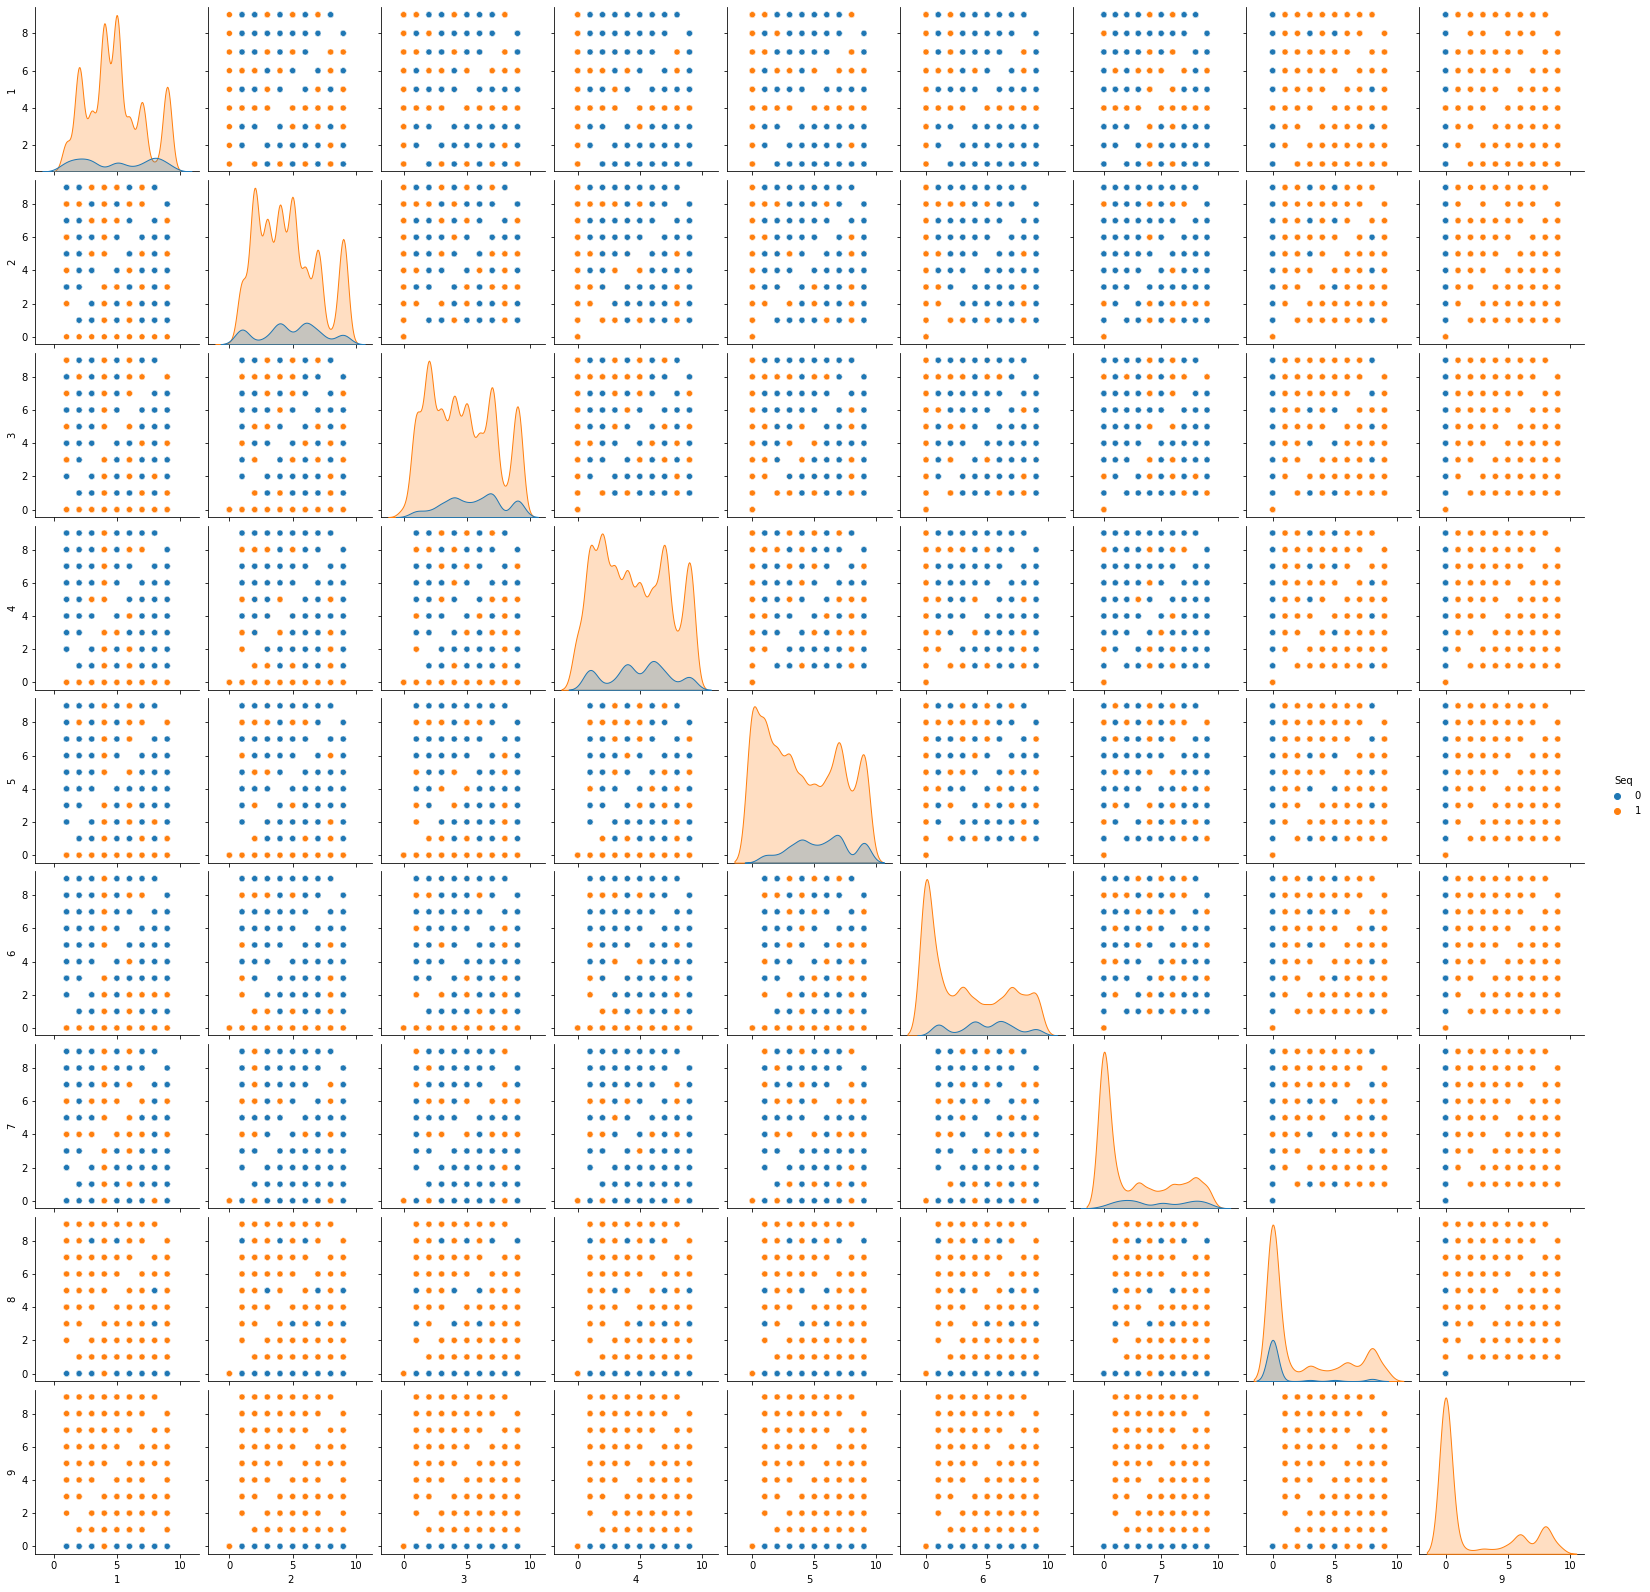

In [20]:
import seaborn as sns
sns.pairplot(dfnums, hue = 'Seq')